In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fdc = pd.read_csv("Fraud_check.csv")
fdc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fdc.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
Column_names = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Ecperience', 'Urban']

In [6]:
fdc['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [7]:
fdc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


Text(0, 0.5, 'Population')

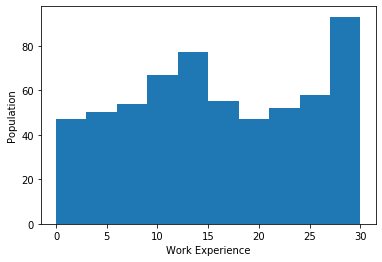

In [8]:
plt.hist(fdc['Work.Experience'])
plt.xlabel('Work Experience')
plt.ylabel('Population')

In [9]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
for column_name in fdc.columns:
    if fdc[column_name].dtype == object:
        fdc[column_name] = le.fit_transform(fdc[column_name])
    else:
           pass

In [11]:
fdc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [12]:
fdc.loc[fdc['Taxable.Income']<= 30000, 'New'] = 'Risky'
fdc.loc[fdc['Taxable.Income'] > 30000, 'New'] = 'Good'

In [13]:
#fdc.drop(labels='Taxable.Income', axis=1, inplace=True)
fdc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,New
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [14]:
# Split the data into X and Y

X=fdc.iloc[:,0:5]
X

Y=fdc.iloc[:,5]
Y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

In [15]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
Classifier = DecisionTreeClassifier(criterion='gini')

In [19]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
Xpred = Classifier.predict(X_test)

In [21]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[36, 35],
       [48, 61]], dtype=int64)

In [22]:
acc = accuracy_score(Xpred,y_test)*100
acc

53.888888888888886

In [23]:
# Tuning the parameters

Classifier = DecisionTreeClassifier(criterion='gini', min_samples_split=50)
Classifier.fit(X_train,y_train)
Xpred = Classifier.predict(X_test)

In [24]:
conf_mat = confusion_matrix(Xpred,y_test)
conf_mat

array([[55, 49],
       [29, 47]], dtype=int64)

In [25]:
acc = accuracy_score(Xpred,y_test)*100
acc

56.666666666666664

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


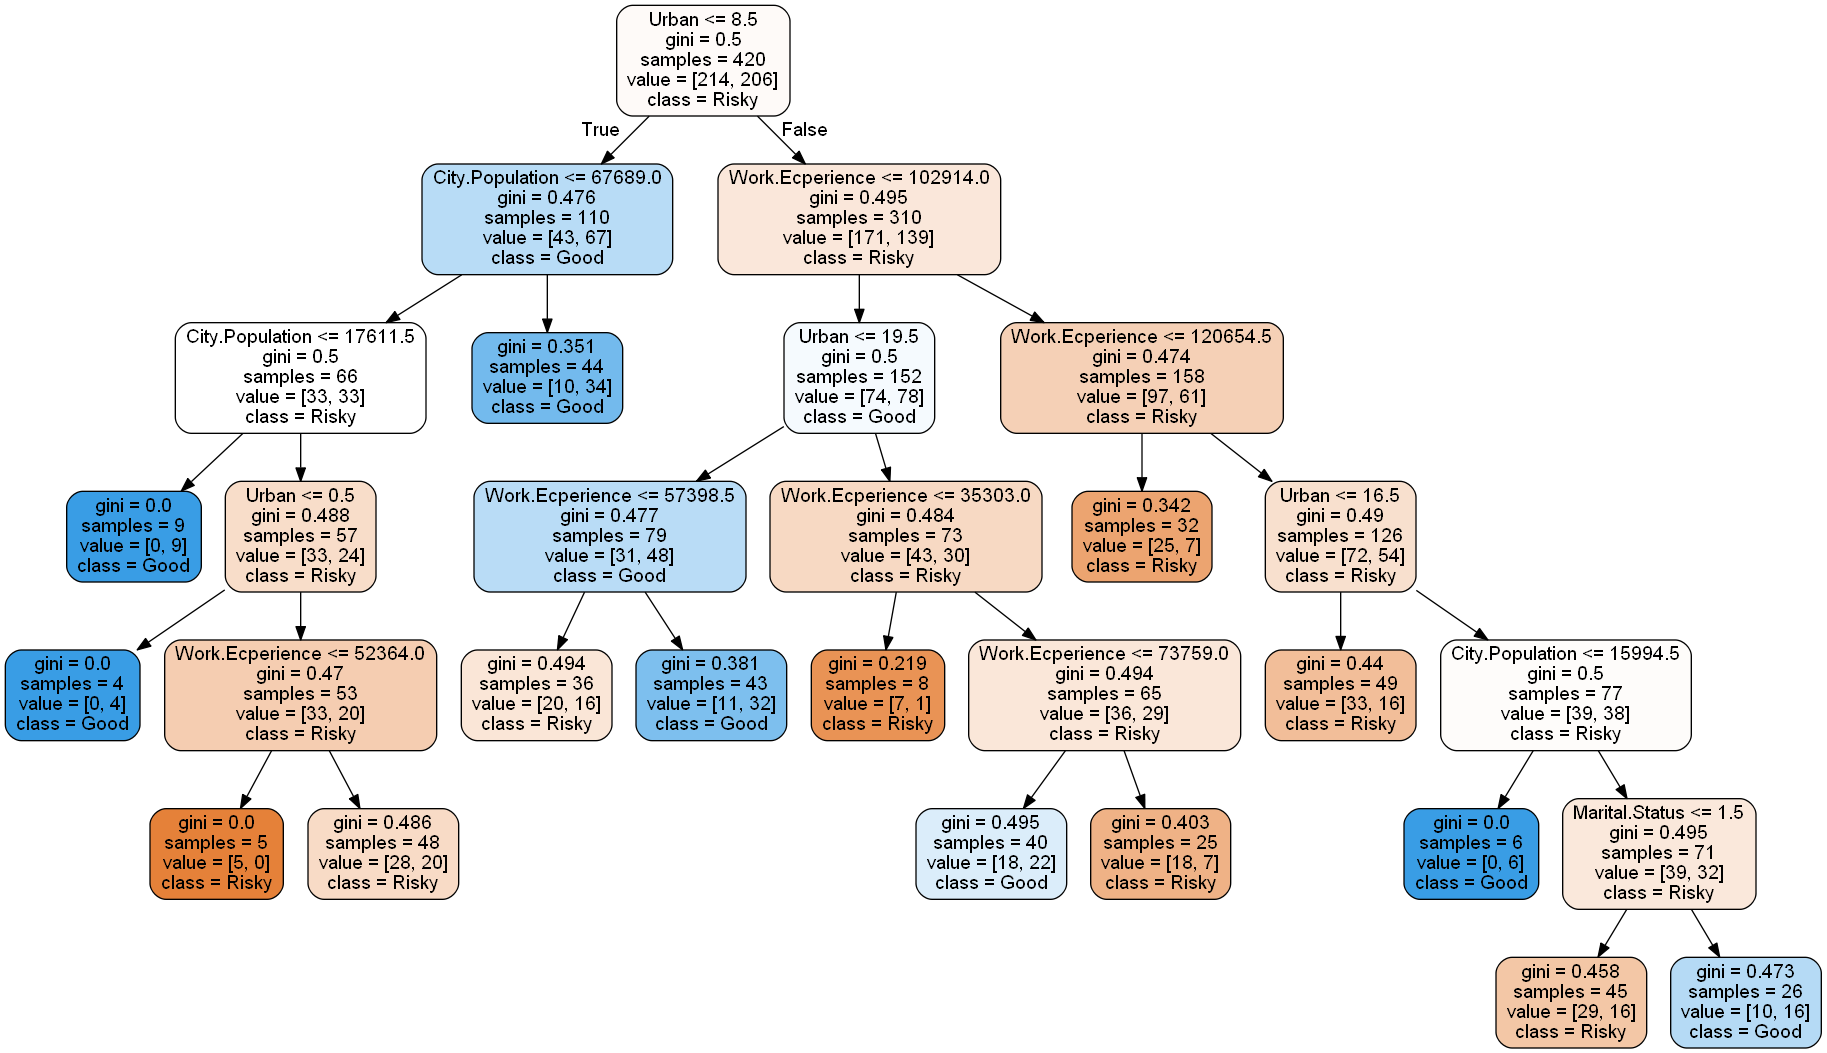

In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(Classifier, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=False, feature_names=Column_names, class_names=['Risky','Good'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
